In [ ]:
!pip install keras-segmentation

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [4]:
from keras_segmentation.models.unet import vgg_unet

n_classes = 23

# Load the VGG-based U-Net model
model = vgg_unet(n_classes, input_height=416, input_width=608)


# Print model summary to get layer names
model.summary()

# Iterate through layers and print layer name, input shape, and output shape
for layer in model.layers:
    print("Layer Name:", layer.name)
    print("Input Shape:", layer.input_shape)
    print("Output Shape:", layer.output_shape)
    print()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 416, 608, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 416, 608, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 416, 608, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 208, 304, 64)         0         ['block1_conv2[0][0]']        
                           

In [ ]:
# Load the weights
model.load_weights("model.h5")

In [15]:
res = model.predict_segmentation(
    inp="001.jpg",
    out_fname="out.png"
)

1/1 [==============================] - 3s 3s/step


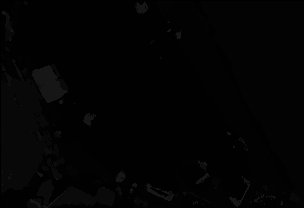

In [8]:
cv2_imshow(res)

In [11]:
input_image = cv2.imread("001.jpg")
resized= cv2.resize(input_image, None, fx=0.05, fy=0.05, interpolation=cv2.INTER_LINEAR)


In [12]:
resized.shape

(200, 300, 3)

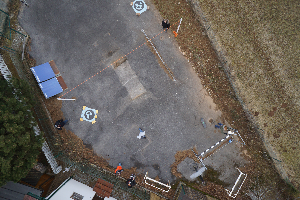

In [13]:
cv2_imshow(resized)

In [14]:
res2 = model.predict_segmentation(
    inp=resized,
    out_fname="out2.png"
)

1/1 [==============================] - 4s 4s/step


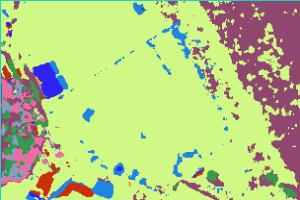

In [17]:
cv2_imshow(cv2.imread("out2.png"))

In [ ]:
res2 = model.predict_segmentation(
    inp=upscaled_image,
    out_fname="out2.png"
)

1/1 [==============================] - 3s 3s/step


In [19]:
upscaled= cv2.resize(input_image, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_LINEAR)
upscaled.shape

(1200, 1800, 3)

In [21]:
res3 = model.predict_segmentation(
    inp=upscaled,
    out_fname="out3.png"
)

1/1 [==============================] - 4s 4s/step


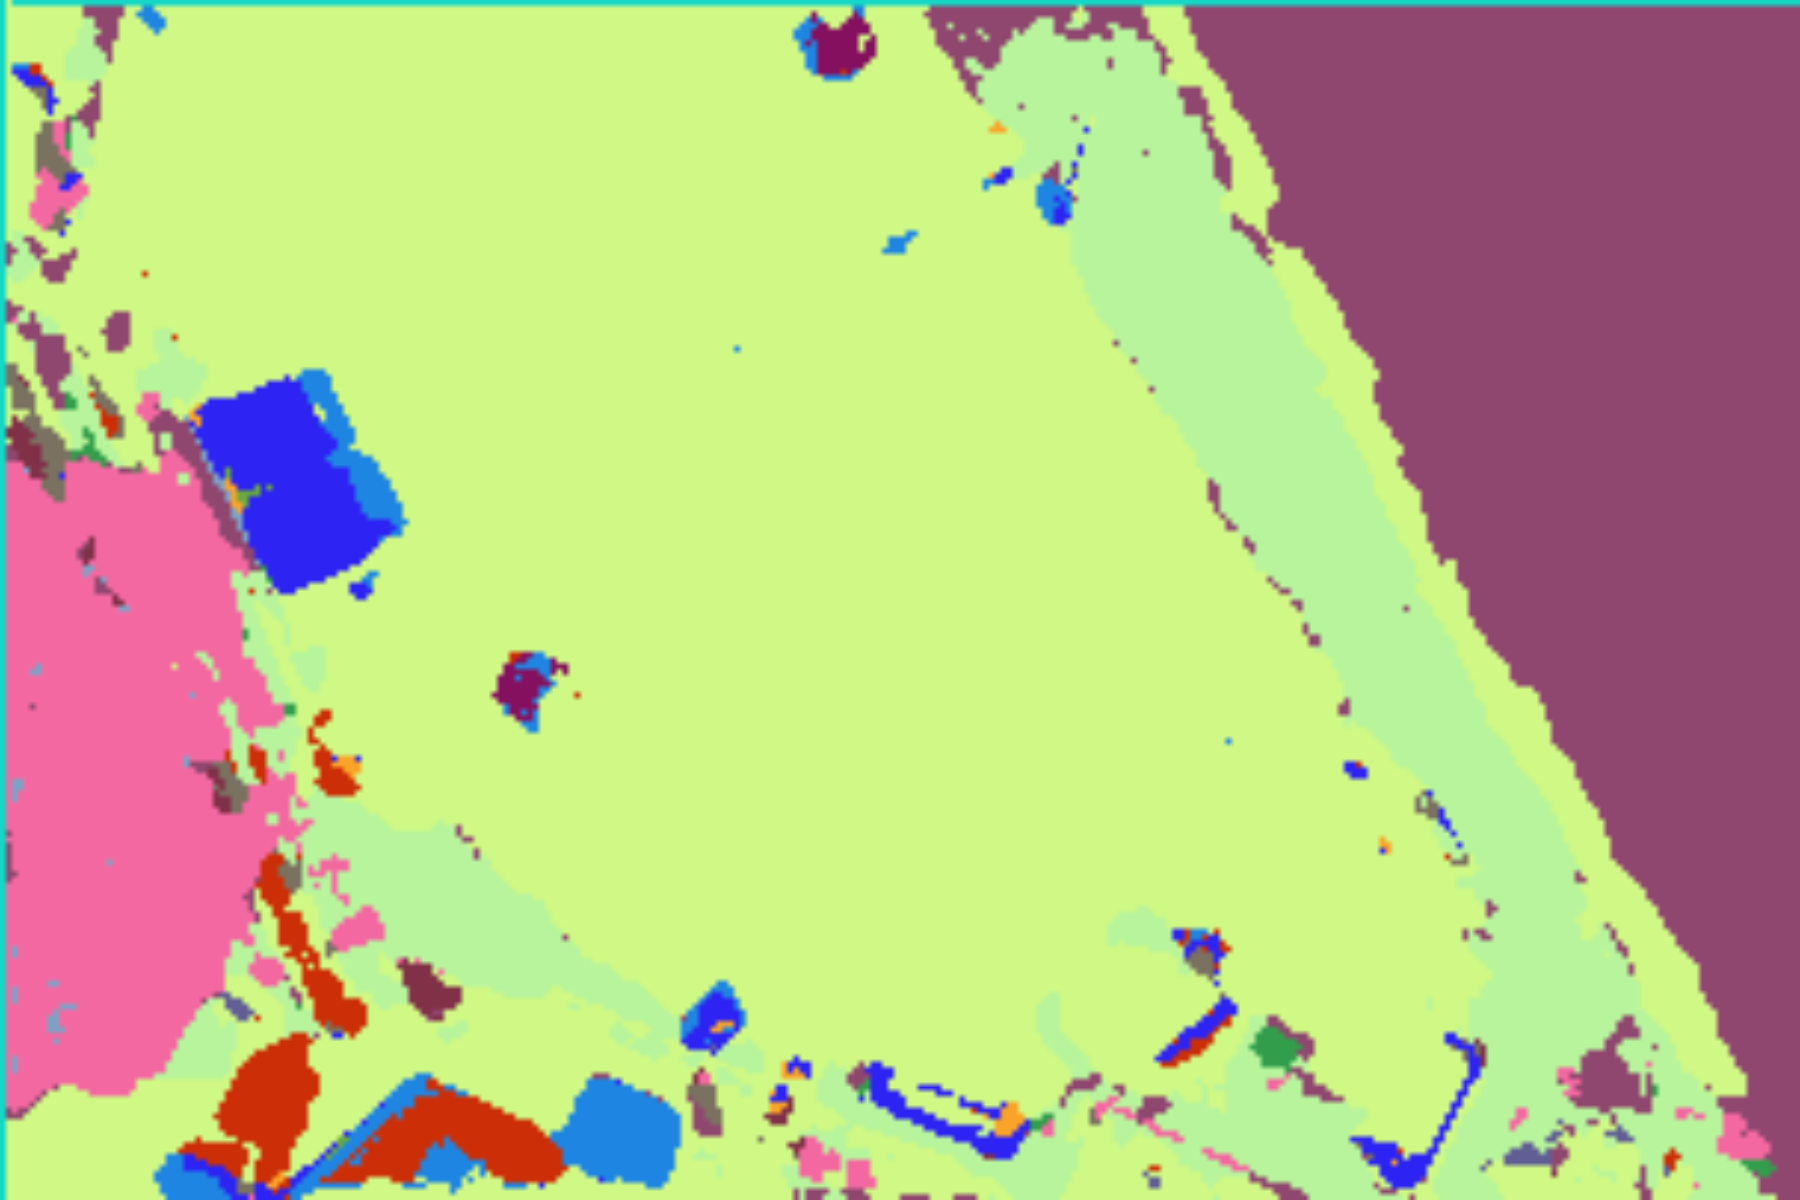

In [22]:
cv2_imshow(cv2.imread("out3.png"))

In [23]:
upscaled2= cv2.resize(input_image, None, fx=10, fy=10, interpolation=cv2.INTER_LINEAR)
upscaled2.shape

(40000, 60000, 3)

In [24]:
res4 = model.predict_segmentation(
    inp=upscaled,
    out_fname="out4.png"
)

1/1 [==============================] - 5s 5s/step


In [ ]:
# Function to perform median fusion
def median_fusion(predictions):
    return np.median(predictions, axis=0)

In [5]:
def predict(x):
  input_image = cv2.imread("001.jpg")
  inp_size = input_image.shape
    # Upscale the input image by a factor of 2
  upscaled_image = cv2.resize(input_image, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

  # Downscale the input image by a factor of 0.5
  downscaled_image = cv2.resize(input_image, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_LINEAR)

  # Predict segmentation masks for the original, upscaled, and downscaled images
  original_prediction = model.predict_segmentation(inp=input_image, out_fname='out1.png')
  upscaled_prediction = model.predict_segmentation(inp=upscaled_image, out_fname='out2.png')
  downscaled_prediction = model.predict_segmentation(inp=downscaled_image, out_fname="out3.png")

  # Combine the predictions using median fusion
  combined_prediction = median_fusion([cv2.resize(original_prediction, inp_size, interpolation=cv2.INTER_LINEAR),
                              cv2.resize(upscaled_prediction, inp_size, interpolation=cv2.INTER_LINEAR),
                                       cv2.resize(downscaled_prediction, inp_size, interpolation=cv2.INTER_LINEAR)
                                       ])

  # Save the combined prediction
  cv2.imwrite("output.png", combined_prediction)

In [41]:
predict('001.jpg')

1/1 [==============================] - 4s 4s/step
